In [27]:
import ROOT as r
import numpy as np

r.gStyle.SetOptStat(0)

In [28]:
f = r.TFile("pienux_out_stripped.root")
f.ls()

TFile**		pienux_out_stripped.root	
 TFile*		pienux_out_stripped.root	
  KEY: TTree	atar;6	Energy deposited in the ATAR [current cycle]
  KEY: TTree	atar;5	Energy deposited in the ATAR [backup cycle]
  KEY: TTree	atar;4	Energy deposited in the ATAR [backup cycle]
  KEY: TTree	calorimeter;2	Energy deposited in the calorimeter [current cycle]
  KEY: TTree	calorimeter;1	Energy deposited in the calorimeter [backup cycle]
  KEY: TTree	degrader;2	Degrader [current cycle]
  KEY: TTree	degrader;1	Degrader [backup cycle]
  KEY: TTree	init;2	Initial conditions of the simulation [current cycle]
  KEY: TTree	init;1	Initial conditions of the simulation [backup cycle]


In [29]:
t = f.Get("calorimeter")
print([x.GetName() for x in t.GetListOfBranches()])

['time', 'edep', 'x', 'y', 'z', 'r', 'theta', 'phi', 'theta_e', 'phi_e', 'nparticles', 'has_pion', 'has_muon']


In [30]:
t.AddFriend("atar")

In [31]:
h = r.TH2D("h", "Energy in Calorimeter with 28 Rad. Lengths of LXe", 
            100,0,3.14,
            200,0,100)

c = r.TCanvas()
c.Divide(2,1)
c.cd(1)
t.Draw("edep:theta>>h","theta > -10 && atar.has_pion && atar.pion_dar","colz")

angles = [10, 18, 20, 22, 25, 30, 35, 40, 50]
radangles = np.deg2rad(angles)
colors = [1, 2, 3, 4, 6, 7, 8, 9, 11]
lines = []
for i in range(9):
    lines.append(r.TLine(radangles[i], 0, radangles[i], 100))
    lines.append(r.TLine(np.pi - radangles[i], 0, np.pi - radangles[i], 100))
    lines[2*i].SetLineColor(colors[i])
    lines[2*i].Draw()
    lines[2*i + 1].SetLineColor(colors[i])
    lines[2*i + 1].Draw()

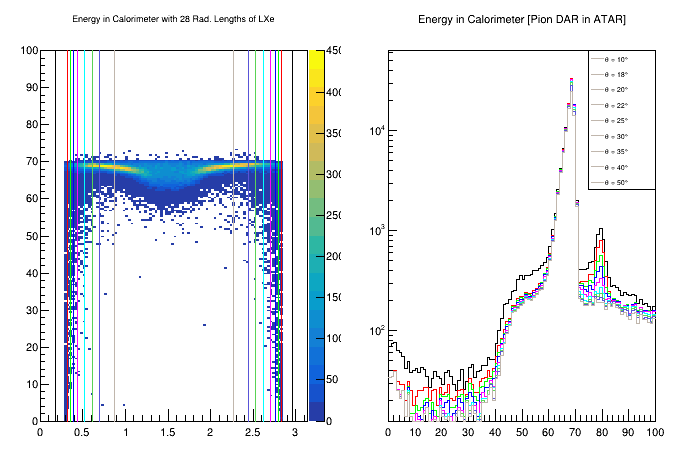

In [32]:
c.cd(2)
h2 = r.TH1D("h2", "Energy in Calorimeter [Pion DAR in ATAR]", 
            100,0,100)
lgd = r.TLegend(0.7, 0.6, 0.9, 0.9)

#NOTE: I had to repeat the curve with index 0 for the "SAME" option to not fail while
# still being able to refer to >>h2
t.SetLineColor(colors[0])
t.Draw("edep>>h2", "theta > " + str(radangles[0]))
for i in range(0,9):
    t.SetLineColor(colors[i])
    t.Draw("edep", "theta > " + str(radangles[i]), "SAME")
    lgd.AddEntry(t, "#theta = " + str(angles[i]) + "#circ", "l")
c.GetPad(2).SetLogy()
lgd.Draw()
c.Draw()